In [1]:
import numpy as np 
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/users/mt/Documents/TCEproject/data/data3.csv")
data = data.drop(['Unnamed: 0'], axis =1)
data

,CD4NadirBeforeTCE,BaselineCD4Count,pastrawLoad,pastCD4count,BaselineRNAlog
0,5,100,1000,40,0
1,267,296,15849,5,1
2,296,369,3981,164,0
3,19,19,19953,156,1
4,106,207,15849,472,0
...,...,...,...,...,...
109147,50,101,501,51,0
109148,213,403,79,112,1
109149,224,247,3981,244,1
109150,9,81,5012,88,1


In [3]:
X=data.drop('BaselineRNAlog',axis=1).values### independent features
y=data['BaselineRNAlog'].values###dependent features


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test    = train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [9]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

In [10]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [11]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4,64)
        self.fc2 = nn.Linear(64,32)
        self.fc3 = nn.Linear(32,2)
        self.dropout = nn.Dropout(p =0.2)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x))
        return x
        

In [12]:
####instantiate my ANN_model
torch.manual_seed(20)
model = Model()
model.parameters


<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)>

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [14]:
epochs = 500
final_losses = []
for i in range(epochs):
    i = i +1
    y_predicts = model(X_train)
    loss = criterion(y_predicts, y_train)
    final_losses.append(loss)
    if i%10 ==1:
        print("Epoch number: {} and the loss: {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

<ipython-input-11-06f165099be7>:11: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(self.fc3(x))


Epoch number: 1 and the loss: 0.7033944129943848
Epoch number: 11 and the loss: 0.6060331463813782
Epoch number: 21 and the loss: 0.6002016067504883
Epoch number: 31 and the loss: 0.596436619758606
Epoch number: 41 and the loss: 0.5930494666099548
Epoch number: 51 and the loss: 0.5888329148292542
Epoch number: 61 and the loss: 0.5837516188621521
Epoch number: 71 and the loss: 0.578528881072998
Epoch number: 81 and the loss: 0.5724590420722961
Epoch number: 91 and the loss: 0.5656499862670898
Epoch number: 101 and the loss: 0.5577614903450012
Epoch number: 111 and the loss: 0.5497943162918091
Epoch number: 121 and the loss: 0.5405873656272888
Epoch number: 131 and the loss: 0.5306794047355652
Epoch number: 141 and the loss: 0.525600790977478
Epoch number: 151 and the loss: 0.514616072177887
Epoch number: 161 and the loss: 0.5098196864128113
Epoch number: 171 and the loss: 0.5006152987480164
Epoch number: 181 and the loss: 0.49626997113227844
Epoch number: 191 and the loss: 0.49027925729

In [15]:
def evaluate(model):
    correct = 0 
    for test_data in X_test:
        test_data = test_data.float()
        output = model(test_data)
        predicted = torch.max(output)
        correct += (predicted == y_test).sum()
    print("Test accuracy:{:.3f}% ".format( float(correct) / (len(X_test)*64)))


In [16]:
accuracy = evaluate(model)

<ipython-input-11-06f165099be7>:11: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(self.fc3(x))


Test accuracy:0.842% 


In [17]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'loss')

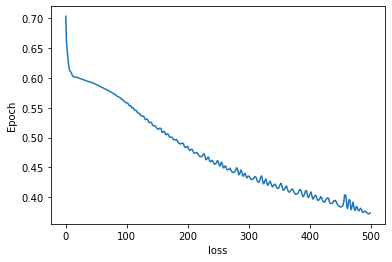

In [18]:
plt.plot(range(epochs),final_losses)
plt.ylabel("Epoch")
plt.xlabel("loss")

In [21]:
### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

<ipython-input-11-06f165099be7>:11: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(self.fc3(x))


0
0
0
1
1
1
1
1
1
1
0
1
0
1
0
1
0
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
0
1
0
0
0
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
1
0
1
0
1
1
0
1
1
1
0
1
0
0
1
1
0
1
0
1
1
1
1
0
0
0
1
1
1
0
1
1
1
1
0
0
0
1
1
1
1
0
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
1
0
1
1
1
1
1
0
0
1
1
0
0
1
1
1
1
1
1
0
1
0
0
0
1
0
0
0
1
1
1
1
1
1
0
1
0
0
1
1
1
1
1
0
1
0
1
0
1
1
1
0
0
0
0
0
0
1
1
1
0
1
1
1
1
0
0
1
1
0
0
1
1
1
0
1
0
1
1
0
1
0
0
0
1
1
1
0
0
0
1
1
1
1
0
0
1
1
1
0
1
0
0
1
0
1
0
1
1
1
0
0
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
0
0
1
1
0
0
0
1
0
1
0
1
0
0
0
1
1
0
1
1
1
1
0
0
0
1
0
1
1
1
1
0
1
0
1
1
1
1
1
0
1
0
1
0
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
0
0
1
1
0
0
1
0
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
1
0
1
0
1
1
0
1
1
0
1
1
1
0
0
1
1
1
1
1
0
0
0
1
1
1
0
0
1
1
0
1
0
1
1
1
1
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
0
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
0
0
1
1
1
1
1
0
0
0
1
0
0
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
0
0
0
0
1
1
0
1
0
1
1
1
1
0
0
1
0
0
0
1
1
0
1
0
1
0
0
1
1
0
1
0
1
0
0
1
1
1
0
1
1
1
1
1
1
0
0
1
0


1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
0
1
0
0
0
1
1
1
1
1
1
0
1
1
0
1
1
1
0
0
1
1
0
1
0
1
1
1
1
0
1
1
0
1
0
0
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
0
0
0
1
1
0
0
1
1
1
1
1
1
0
0
0
0
1
0
0
1
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
0
0
0
1
1
1
0
1
0
0
1
0
0
0
1
1
0
1
1
1
1
0
0
0
1
1
1
1
1
1
0
0
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
0
1
0
0
1
0
0
0
1
1
1
0
1
1
1
0
1
0
0
1
0
0
1
1
1
1
0
0
0
1
1
1
0
0
1
0
0
1
1
1
1
1
1
1
1
1
0
1
0
1
0
0
1
1
1
1
0
1
1
1
0
0
1
0
0
1
1
0
1
0
0
1
1
1
1
1
1
0
1
1
0
0
1
0
0
1
1
0
1
1
1
1
0
1
0
1
1
1
1
0
1
0
1
1
1
0
1
1
0
1
1
0
1
1
0
1
0
1
1
1
0
1
0
0
1
0
1
0
1
0
0
1
0
0
1
1
0
1
0
1
1
1
1
0
1
1
1
0
1
0
0
0
1
1
1
1
1
0
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
1
0
0
0
1
1
1
1
1
1
0
1
1
1
0
1
0
1
1
0
1
1
1
1
1
1
1
0
0
0
0
1
1
1
0
1
1
0
1
1
1
1
1
0
0
0
1
1
1
1
0
0
0
1
0
0
0
0
0
1
0
1
0
1
1
0
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
1
1
0
1
1
1
0
1
0
1
0
0
1
1
1
1
0
1
1
1
0
1
0
1


0
0
1
1
1
0
1
1
0
0
0
1
1
1
0
0
1
0
0
1
0
1
1
1
1
0
1
0
0
1
1
1
1
1
0
0
1
0
0
0
0
1
1
0
1
1
0
1
1
1
0
0
1
0
1
1
1
1
1
0
1
1
1
0
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
0
1
0
1
0
0
1
1
1
1
1
1
1
1
1
0
1
0
1
0
0
1
1
1
0
1
1
1
0
0
1
0
1
1
1
0
0
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
0
0
1
0
0
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
0
0
0
0
1
1
1
0
1
1
1
0
0
0
1
0
0
0
1
0
1
0
0
0
1
1
0
0
1
0
1
0
0
0
0
0
0
1
0
1
0
1
0
0
0
1
1
0
0
1
0
0
0
1
1
0
0
1
1
0
0
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
0
1
1
0
0
0
0
0
1
0
1
0
0
0
1
1
0
1
0
1
1
0
0
0
1
0
0
1
0
0
1
1
1
1
1
1
1
0
1
1
0
0
0
1
1
1
1
0
0
0
0
0
0
1
1
1
0
0
1
1
1
0
1
1
1
0
0
0
0
0
0
0
1
1
0
1
0
1
0
1
0
0
1
1
0
0
1
1
1
0
1
0
0
0
0
0
1
1
1
0
1
1
0
1
1
0
0
1
1
0
0
0
0
1
1
0
1
0
1
0
0
0
1
1
1
1
1
1
1
1
0
0
1
0
1
0
1
0
0
1
1
1
1
0
1
1
0
0
1
1
1
1
0
0
1
1
0
0
0
0
1
1
1
1
0
1
1
1
0
0
1
0
0
0
1
1
0
1
0
1
0
0
1
0
1
0
0
1
0
0
1
0
0
1
1
1
0
1
0
1
1
1
0
0
1
0
1
1
1
1
1
1
0
1
0
1
1
0
1
0
0
0
1
1
1
1
1
1
1
1
1
0
0
1
0
0
1
1
0


0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
0
1
1
0
0
1
1
0
0
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
0
0
0
1
1
0
0
1
0
0
0
1
0
0
1
1
0
1
1
0
1
1
1
0
0
1
1
0
1
0
1
1
0
1
0
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
0
0
1
0
0
1
1
1
1
0
0
1
0
1
1
0
0
1
0
1
0
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
0
0
1
0
1
0
0
0
0
0
0
1
1
0
0
1
1
1
1
0
1
0
1
1
1
1
0
0
0
0
1
0
0
1
1
0
1
1
1
0
0
0
0
1
1
1
1
1
1
0
1
1
1
0
0
0
1
1
1
0
1
1
1
0
1
0
1
0
0
1
1
1
1
1
0
0
1
0
1
0
1
0
0
1
0
1
1
1
1
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
0
0
1
1
1
0
0
1
1
1
1
0
1
0
0
1
1
1
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
1
1
0
0
0
1
1
0
1
1
1
0
1
1
1
1
0
0
1
0
1
1
0
0
0
0
0
0
1
1
0
1
1
1
1
1
1
1
1
0
1
0
1
1
0
0
0
0
1
1
0
1
1
1
0
1
0
1
1
1
0
1
1
1
0
0
1
1
1
0
1
1
1
1
0
0
1
0
1
0
0
1
1
1
1
0
0
1
1
1
1
1
1
1
0
0
0
1
1
1
0
0
1
1
1
1
1
1
1
1
0
0
1
1
0
1
0
0
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
0
0
1
1
1
0
0
1
1
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
1
1
1
1
0
1
1
0
1
1
1
1
1
1
0
0
0
0
1
1
0
1
0
1
1
1
0
0
1


0
0
1
1
1
0
0
0
1
0
0
1
1
0
0
1
1
0
1
1
1
1
1
0
1
0
0
1
0
1
1
1
0
0
1
0
1
1
1
1
1
0
1
0
1
0
1
1
0
1
1
1
0
0
1
0
1
1
1
1
1
1
0
0
1
1
1
0
1
1
0
0
1
1
1
1
0
0
0
0
0
1
0
1
1
0
0
0
1
0
0
0
1
1
0
1
0
1
1
0
0
0
1
1
1
0
0
1
1
1
0
0
0
0
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
0
0
0
0
1
0
1
1
0
1
0
0
1
1
1
0
1
1
1
1
0
0
0
1
1
0
1
0
1
0
1
1
1
0
0
1
0
1
1
0
0
1
0
0
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
0
1
1
1
0
0
0
1
1
1
1
1
1
1
0
0
0
1
1
1
0
1
0
1
1
1
0
0
0
0
1
1
1
1
1
0
1
0
1
0
0
1
0
1
1
0
1
1
1
1
0
0
0
0
1
1
1
0
1
1
0
0
1
1
1
1
0
0
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
0
0
0
1
1
0
1
1
1
1
1
1
1
0
0
1
0
1
1
1
0
1
1
0
1
0
1
1
1
1
1
0
0
1
1
1
0
0
0
1
1
1
1
0
0
1
1
0
0
1
1
0
1
1
0
0
0
0
1
0
1
1
1
0
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
0
1
1
1
1
1
1
1
0
0
1
0
1
1
0
0
0
0
0
0
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
1
1
0
1
1
0
0
0
1
1
1
1
1
1
1
1
0
0
0
1
0
0
0
1
1
1
1
1
1
0
0
1
1
1
0
1
1
1
1
0
1
0
1
1
1
1
0
1
1
1
1
0
1
0


1
0
1
1
1
1
1
0
0
1
1
0
1
1
0
0
1
1
1
0
1
0
0
1
1
1
0
1
0
1
0
1
1
1
0
0
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
1
1
0
1
1
0
1
0
0
0
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
1
1
0
0
1
1
0
1
0
1
0
0
1
0
1
1
0
1
0
1
0
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
0
1
1
0
0
1
0
1
0
1
1
1
1
1
1
0
0
1
1
1
0
1
0
0
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
0
0
0
1
1
0
0
1
1
0
0
1
1
0
0
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
0
0
0
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
0
1
1
1
0
1
1
0
0
0
1
1
1
1
0
0
1
0
0
0
0
0
1
0
0
1
1
1
0
1
1
1
1
1
1
1
0
0
1
0
0
1
0
1
1
1
0
1
1
0
0
1
1
1
1
1
1
0
1
1
1
0
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
0
0
0
1
1
1
1
1
0
1
0
0
0
1
0
0
1
1
1
0
0
1
0
0
0


In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[ 6222,  1835],
       [ 1850, 11924]])

Text(69.0, 0.5, 'Predicted Values')

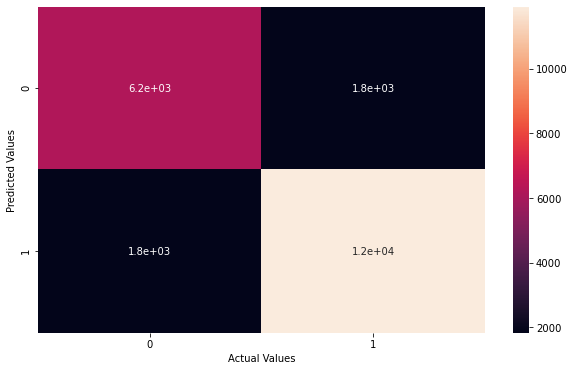

In [23]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [24]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.8312033347075259

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score, recall_score

In [26]:
precision_score(y_test, predictions)

0.8666327494730721

In [27]:
recall_score(y_test, predictions)

0.8656889792362422

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      8057
           1       0.87      0.87      0.87     13774

    accuracy                           0.83     21831
   macro avg       0.82      0.82      0.82     21831
weighted avg       0.83      0.83      0.83     21831



In [29]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(Model, pickle_out)
pickle_out.close()

In [30]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Model(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])


In [ ]:
### Save the model
torch.save(model,'hiv.pt')

In [ ]:
##load the model
torch.load('hiv.pt')

In [ ]:
torch.save(model.state_dict(), 'checkpoint.pth')    